# Hybrid Recommender System

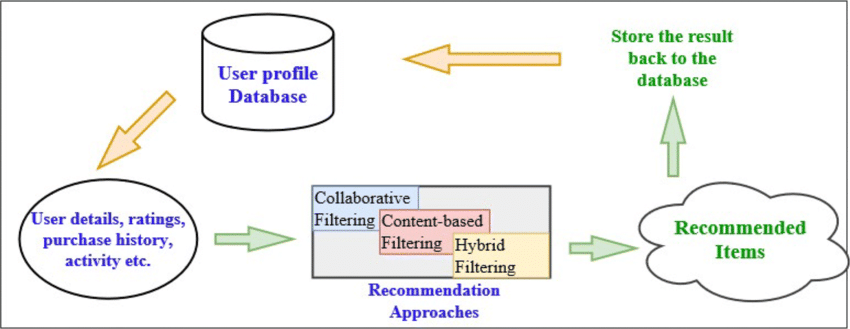!
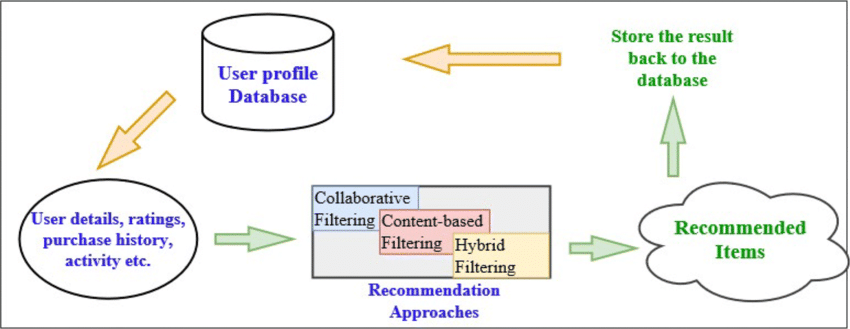

What is a Hybrid Recommender System?

A Hybrid Recommender System combines multiple recommendation techniques to create more accurate and personalized suggestions. By merging different approaches, it overcomes the weaknesses of individual methods and improves overall recommendation quality.

How Does It Work?

Hybrid systems mix methods like:

* ✅ Collaborative Filtering (based on user behavior)
* ✅ Content-Based Filtering (based on item features)


Common Hybrid Approaches:

1. 🔹 Weighted Hybrid – Combines different methods by assigning them weights.
2. 🔹 Switching Hybrid – Switches between methods depending on the user or data.
3. 🔹 Feature Combination – Merges features from multiple techniques into one model.
4. 🔹 Cascade Hybrid – Uses one method first, then refines results with another.


By blending multiple techniques, hybrid systems make recommendations more relevant, diverse, and reliable. 🚀

# Business Problem


Make 10 movie recommendations for the user whose ID is given using the item-based and user-basedrecommender methods.

# Dataset Story

The dataset is provided by MovieLen, a movie recommendation service. It contains the movies as well as the rating scores based on these movies. It contains 2,000,0263 ratings on 27,278 movies. This data set iise was created on 17 October 2016. It contains 138,493 users and data between 09 January 1995 and 31 March 2015. The users were selected randomly. It is known that all selected users voted for at least 20 movies.

# Variables

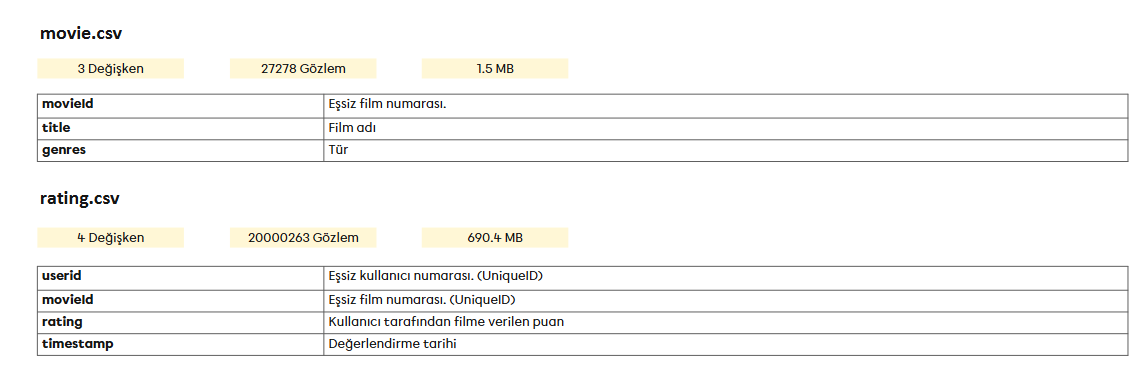

# Required Libraries

In [1]:
# import Required Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Adjusting Row Column Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

# User Based Recommendation

# TASK 1

**Step 1: Read the movie, rating data**

In [3]:
# Loading the Data Set
movie = pd.read_csv('/kaggle/input/movie-datasets/movie.csv')
rating = pd.read_csv('/kaggle/input/rating-datasets/rating.csv')

**Step 2: Add the movie names and genres of the Ids from the movie data set to the rating data set.**

In [4]:
df = movie.merge(rating, how="left", on="movieId")

In [5]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(20000797, 6)
##################### Types #####################
movieId        int64
title         object
genres        object
userId       float64
rating       float64
timestamp     object
dtype: object
##################### Head #####################
   movieId             title                                       genres  userId  rating            timestamp
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy     3.0     4.0  1999-12-11 13:36:47
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy     6.0     5.0  1997-03-13 17:50:52
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy     8.0     4.0  1996-06-05 13:37:51
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy    10.0     4.0  1999-11-25 02:44:47
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy    11.0     4.5  2009-01-02 01:13:41
##################### Tail ####

**Step3: Keep the names of the movies whose total number of votes is below 1000 in the list and remove them from the dataset.**

In [6]:
df.shape   #(20000797 : yorum olduğu görülür

(20000797, 6)

In [7]:
df["title"].nunique()  #27262 eşssiz film sayısıdır.

27262

In [8]:
df["title"].value_counts().head() #hangi filme kaçar tane yorum gelmiş

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: count, dtype: int64

In [9]:
#df["title"].value_counts(): df DataFrame'inde yer alan her bir film başlığını sayar.
# value_counts() fonksiyonu, her bir başlığın kaç defa geçtiğini döndürür.
#pd.DataFrame(...): Sonuçları bir DataFrame'e dönüştürür.
# Bu DataFrame'in her bir satırı bir film başlığını ve
# bu başlığın aldığı yorum sayısını gösterir.
comment_counts = pd.DataFrame(df["title"].value_counts())

In [10]:
comment_counts.head ()

,count
title,
Pulp Fiction (1994),67310
Forrest Gump (1994),66172
"Shawshank Redemption, The (1994)",63366
"Silence of the Lambs, The (1991)",63299
Jurassic Park (1993),59715


In [11]:
#comment_counts DataFrame'inden yorum sayısı 1000'den az olan filmleri seçer.
rare_movies = comment_counts[comment_counts["count"] <= 1000].index

In [12]:
#yorum sayısı 1000'den fazla olan filmleri seçer.
common_movies = df[~df["title"].isin(rare_movies)]

In [13]:
common_movies["title"].nunique()  #3159 film sayısı kalmıştır. Veri setimizin ilk halinden 27.000 den 3000 e düşmüştür.

3159

**Step 4: Create a pivot table for the dataframe with userIDs in the index, movie names in the columns, and ratings as values.**

In [14]:
#Satırlarda kullanıcılar, sütunlarda filmler yer alır,
#ve her hücrede o kullanıcının ilgili filme verdiği puan bulunur.
#Eğer bir kullanıcı bir filme puan vermediyse, o hücrede NaN (bilgi yok) yer alır.
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

In [15]:
user_movie_df.head ()

title   'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splendo

**Step5: Functionalize all the operations performed**

In [16]:
def create_user_movie_df():
    import pandas as pd
    movie = pd.read_csv('/kaggle/input/movie-datasets/movie.csv')
    rating = pd.read_csv('/kaggle/input/rating-datasets/rating.csv')
    df = movie.merge(rating, how="left", on="movieId")
    comment_counts = pd.DataFrame(df["title"].value_counts())
    rare_movies = comment_counts[comment_counts["count"] <= 1000].index
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df

user_movie_df = create_user_movie_df()

# Task 2: Determining the Movies Watched by the User to Make a Recommendation

**Step 1: Select a random user ID**

In [17]:
random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values[0])
random_user

28941

**Step 2: Create a new dataframe named random_user_dfa consisting of observation units of the selected user.**

In [18]:
#random_user tarafından temsil edilen kullanıcıyı bulup,
#ona ait tüm verileri elde etmek için kullanılır.
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df

title    'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splend

**Step3: Assign the movies voted by the selected users to a list named movies_watched**

In [19]:
#rastgele seçilen kullanıcının izlediği (yani puan verdiği) filmleri bulmaktır.
#random_user_df.notna() : NaN (boş) olmayan değerleri kontrol eder.
#Eğer bir hücrede değer varsa (yani kullanıcı o filme puan vermişse),
#bu True döndürür, boşsa (yani kullanıcı o filme puan vermemişse) False döndürür.
# rastgele seçilen kullanıcı tarafından izlenmiş (puan verilmiş) filmleri bulur
#ve bunları bir liste (movies_watched) olarak döndürür.
#Bu liste, kullanıcının izlediği tüm filmlerin adlarını içerir.
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()

#Kullanıcı toplam kaç film izlemiştir
len(movies_watched)

33

In [20]:
#seçilen kullanıcı tarafından izlenmiş (puan verilmiş) filmlerin listesi
movies_watched

['Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Aladdin (1992)',
 'American President, The (1995)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Bullets Over Broadway (1994)',
 'Clueless (1995)',
 'Disclosure (1994)',
 'Forrest Gump (1994)',
 'Four Weddings and a Funeral (1994)',
 'Home Alone (1990)',
 'Jurassic Park (1993)',
 'Like Water for Chocolate (Como agua para chocolate) (1992)',
 'Little Women (1994)',
 "Mr. Holland's Opus (1995)",
 'Mrs. Doubtfire (1993)',
 'Much Ado About Nothing (1993)',
 "Muriel's Wedding (1994)",
 'Nine Months (1995)',
 'Operation Dumbo Drop (1995)',
 'Piano, The (1993)',
 'Postman, The (Postino, Il) (1994)',
 'Ready to Wear (Pret-A-Porter) (1994)',
 'Remains of the Day, The (1993)',
 'Sabrina (1995)',
 "Schindler's List (1993)",
 'Secret Garden, The (1993)',
 'Sense and Sensibility (1995)',
 'Shadowlands (1993)',
 'Silence of the Lambs, The (1991)',
 'Star Trek: Generations (1994)',
 'Stargate (1994)']

# Task 3: Accessing the Data and IDs of Other Users Watching the Same Movies

**Step 1: Select the columns of the movies watched by the selected user from user_movie_df and create a new dataframe named movies_watched_df.**

In [21]:
#rastgele seçilen kullanıcının izlediği filmlerin verilerini içeren
#yeni bir DataFrame (movies_watched_df) oluşturur
movies_watched_df = user_movie_df[movies_watched]

In [22]:
movies_watched_df.head()

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),"American President, The (1995)",Apollo 13 (1995),Babe (1995),Bullets Over Broadway (1994),Clueless (1995),Disclosure (1994),Forrest Gump (1994),Four Weddings and a Funeral (1994),Home Alone (1990),Jurassic Park (1993),Like Water for Chocolate (Como agua para chocolate) (1992),Little Women (1994),Mr. Holland's Opus (1995),Mrs. Doubtfire (1993),Much Ado About Nothing (1993),Muriel's Wedding (1994),Nine Months (1995),Operation Dumbo Drop (1995),"Piano, The (1993)","Postman, The (Postino, Il) (1994)",Ready to Wear (Pret-A-Porter) (1994),"Remains of the Day, The (1993)",Sabrina (1995),Schindler's List (1993),"Secret Garden, The (1993)",Sense and Sensibility (1995),Shadowlands (1993),"Silence of the Lambs, The (1991)",Star Trek: Generations (1994),Stargate (1994)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0
4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN
5.0,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,3.0,NaN,3.0,NaN,4.0


**Step 2: Create a new dataframe named user_movie_count, which contains information about how many movies each user watched.**

In [23]:
#her bir filmin kaç kullanıcı tarafından izlendiğini (puan verildiğini) hesaplar
#movies_watched_df DataFrame'inin transpose (tersten) halini alırız.
#Yani satırlar ve sütunlar yer değiştirir.
#filmler satırlara ve kullanıcılar sütunlara dönüşür.
#Bu, her bir filmi izleyen kullanıcıları sayabilmemiz için gereklidir.
#.notnull(): Bu fonksiyon, her hücreyi kontrol eder
#ve eğer hücrede NaN (boş) olmayan bir değer varsa True, yoksa False döndürür.
#her hücrede, kullanıcının o filme puan verip vermediğine bakıyoruz.
#Eğer True dönerse, kullanıcı filmi izlemiş demektir.
#.sum() fonksiyonu, her bir sütundaki True değerlerini toplar.
#Çünkü Pandas'ta True = 1 ve False = 0 olarak kabul edilir.
#Sonuç olarak, her film için, kaç kullanıcının o filme puan verdiğini
#(yani izlediğini) saymış oluruz.
#user_movie_count değişkeni, her filmin izleyen kullanıcı sayısını tutar.
# Bu, her bir film için, o filme puan veren (izleyen) kullanıcıların sayısını gösterir.

user_movie_count = movies_watched_df.T.notnull().sum()

In [24]:
#filmler ile izleyen kullanıcı sayıları arasındaki ilişkiyi
#daha düzenli bir şekilde sunar. indeks bilgisi gelmesi için userıd bilgisini değişkene çevirmemiz gerekir
user_movie_count = user_movie_count.reset_index()

In [25]:
#Birinci sütun kullanıcı ID'si olarak adlandırılır,
#ikinci sütun ise her filmin izleyen kullanıcı sayısını içerir.
#Bu işlem, veriyi daha anlaşılır ve kullanılabilir hale getirir.
user_movie_count.columns = ["userId", "movie_count"]

**Step3: Create a list named users_same_movies from the user IDs of those who watched 60 percent or more of the movies voted by the selected user.**

In [26]:
#Bu kod, belirli bir yüzdeye göre (örneğin, %60) daha fazla film izleyen
#kullanıcıları bulmak için kullanılır. Bunu daha kurallı hale getirmek için :
## users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
perc = len(movies_watched) * 60 / 100
perc

19.8

In [27]:
# izleyen sayısı 20'den fazla olan filmleri buluyoruz ve
#bu filmleri en çok izlenenlerden en az izlenenlere doğru sıralıyoruz.
user_movie_count[user_movie_count["movie_count"] > 20].sort_values("movie_count", ascending=False).head ()

,userId,movie_count
94230,94231.0,33
100398,100399.0,33
118204,118205.0,33
15918,15919.0,33
124051,124052.0,33


In [28]:
#Kullanıcnın izlediği tüm filmleri izleyen kaç kullanıcı vardır?
user_movie_count[user_movie_count["movie_count"] == 33].count()

userId         17
movie_count    17
dtype: int64

In [29]:
#20 den büyük ortak film izleme sayısını referans alırız
# 20'den fazla olan filmleri izleyen kullanıcıları bulur
# ve bu kullanıcıların ID'lerini bir liste halinde saklar.
# userId sütunu seçilir. Yani, izleyen sayısı 20'den fazla olan filmleri izleyen
#kullanıcıların ID'lerini alırız.
users_same_movies = user_movie_count[user_movie_count["movie_count"] > 20]["userId"]

# Task 4: Determining the User to Recommend and the Most Similar Users

**Step 1: Filter the movies_watched_dfdataframe to find the IDs of users that are similar to the selected user in the user_same_movies list.**

In [30]:
#users_same_movies listesinde bulunan kullanıcıların izlediği filmler seçilir.
#movies_watched_df.index.isin(users_same_movies): Burada, index'teki
#(yani kullanıcı ID'leri) değerlerin, users_same_movies listesinde olup olmadığı kontrol edilir.
#random_user_df DataFrame'inde sadece izlenmiş (puan verilmiş) filmleri seçer.
#movies_watched listesi burada, bu kullanıcının izlediği filmleri belirler.
#pd.concat fonksiyonu, iki DataFrame'i satır bazında birleştirir.
#Bu kod, belirli kullanıcılar ve rastgele bir kullanıcı tarafından izlenen
#filmleri birleştirerek yeni bir DataFrame (final_df) oluşturur.

final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])
final_df.head()

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),"American President, The (1995)",Apollo 13 (1995),Babe (1995),Bullets Over Broadway (1994),Clueless (1995),Disclosure (1994),Forrest Gump (1994),Four Weddings and a Funeral (1994),Home Alone (1990),Jurassic Park (1993),Like Water for Chocolate (Como agua para chocolate) (1992),Little Women (1994),Mr. Holland's Opus (1995),Mrs. Doubtfire (1993),Much Ado About Nothing (1993),Muriel's Wedding (1994),Nine Months (1995),Operation Dumbo Drop (1995),"Piano, The (1993)","Postman, The (Postino, Il) (1994)",Ready to Wear (Pret-A-Porter) (1994),"Remains of the Day, The (1993)",Sabrina (1995),Schindler's List (1993),"Secret Garden, The (1993)",Sense and Sensibility (1995),Shadowlands (1993),"Silence of the Lambs, The (1991)",Star Trek: Generations (1994),Stargate (1994)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
130.0,4.0,3.0,NaN,3.0,3.0,NaN,NaN,3.0,5.0,5.0,5.0,3.0,4.0,3.0,NaN,4.0,4.0,NaN,3.0,NaN,NaN,4.0,4.0,NaN,3.0,NaN,5.0,NaN,NaN,3.0,5.0,NaN,3.0
156.0,3.0,NaN,NaN,5.0,5.0,3.0,NaN,NaN,4.0,5.0,3.0,4.0,5.0,NaN,NaN,4.0,5.0,4.0,3.0,3.0,4.0,5.0,NaN,NaN,NaN,4.0,5.0,NaN,4.0,4.0,5.0,3.0,4.0
158.0,2.0,1.0,4.0,4.0,3.0,5.0,NaN,4.0,NaN,5.0,4.0,3.0,3.0,NaN,NaN,3.0,3.0,NaN,5.0,3.0,3.0,NaN,5.0,NaN,5.0,3.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN
184.0,2.0,3.0,3.0,4.0,4.0,NaN,3.0,NaN,4.0,3.0,3.0,3.0,5.0,NaN,5.0,4.0,5.0,5.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,4.0,5.0,4.0,NaN,4.0,5.0,3.0,4.0
295.0,NaN,NaN,3.0,3.0,3.0,3.0,3.0,2.0,NaN,4.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,NaN,NaN,5.0,NaN,NaN,3.0,3.0,4.0,3.0,4.0,NaN,4.0,3.0,2.0


**Step 2: Create a new corr_df dataframe in which the correlations of users with each other will be found.**

In [31]:
corr_matrix = final_df.T.corr()
print(corr_matrix.columns[corr_matrix.columns.duplicated()])

Index([28941.0], dtype='float64', name='userId')


In [32]:
# Tekrar eden sütunları kaldır
corr_matrix = corr_matrix.loc[:, ~corr_matrix.columns.duplicated()]

In [33]:
# İndekslerde tekrar eden var mı?
print(corr_matrix.index[corr_matrix.index.duplicated()])

Index([28941.0], dtype='float64', name='userId')


In [34]:
#Eğer çıktı Index([], dtype='object') değilse, indekslerde tekrar var demektir. Bunu düzeltmek için:
corr_matrix = corr_matrix[~corr_matrix.index.duplicated()]

In [35]:
corr_df = corr_matrix.unstack().sort_values().drop_duplicates()
corr_df.head ()

userId    userId 
28866.0   67756.0   -0.936065
37121.0   60562.0   -0.915003
80593.0   34103.0   -0.898718
62575.0   21398.0   -0.896612
117826.0  48416.0   -0.883969
dtype: float64

In [36]:
#columns=["corr"] parametresiyle, korelasyon değerlerinin bulunduğu sütuna corr ismini veriyoruz.
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.head ()

,,corr
userId,userId,
28866.0,67756.0,-0.936065
37121.0,60562.0,-0.915003
80593.0,34103.0,-0.898718
62575.0,21398.0,-0.896612
117826.0,48416.0,-0.883969


In [37]:
#user_id_1 ve user_id_2 olarak isimlendirdiğimiz indeksler, korelasyonların hangi iki user_id arasındaki ilişkiyi temsil ettiğini açıkça gösteriyor.
corr_df.index.names = ['user_id_1', 'user_id_2']

In [38]:
#Yani, önceki adımdan sonra user_id_1 ve user_id_2 indeks kolonları, normal sütunlar haline gelir.
corr_df = corr_df.reset_index()
corr_df.head ()

,user_id_1,user_id_2,corr
0,28866.0,67756.0,-0.936065
1,37121.0,60562.0,-0.915003
2,80593.0,34103.0,-0.898718
3,62575.0,21398.0,-0.896612
4,117826.0,48416.0,-0.883969


**Step3: Create a new dataframe named top_users by filtering out users that have a high correlation (over 0.65) with the selected user.**

In [39]:
#Belirli bir kullanıcıya (örneğin, random_user) ait ve 0.65'ten büyük korelasyona sahip diğer kullanıcıları seçtik.
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][["user_id_2", "corr"]].reset_index(drop=True)

In [40]:
#Seçilen kullanıcıları korelasyonlarına göre azalan sırada sıraladık.
top_users = top_users.sort_values(by="corr", ascending=False)
top_users.head()

,user_id_2,corr
19,7542.0,0.772183
18,127259.0,0.763925
17,7438.0,0.752716
16,9783.0,0.747942
15,117826.0,0.736011


**Step4: Import the rating data into the top_users dataframe**

In [41]:
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users.head()

,userId,corr
19,7542.0,0.772183
18,127259.0,0.763925
17,7438.0,0.752716
16,9783.0,0.747942
15,117826.0,0.736011


In [42]:
#top_users.merge(...): top_users verisini, rating verisiyle birleştiriyoruz.
#["userId", "movieId", "rating"]: Yalnızca userId, movieId, ve rating sütunlarını alıyoruz.
#how='inner': Inner join kullanıyoruz, yani sadece her iki DataFrame'de de bulunan ortak kullanıcılar ve filmler ile birleştirme yapıyoruz.

top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')
top_users_ratings.head()

,userId,corr,movieId,rating
0,7542.0,0.772183,6,3.0
1,7542.0,0.772183,10,2.0
2,7542.0,0.772183,17,4.0
3,7542.0,0.772183,19,1.0
4,7542.0,0.772183,21,3.0


In [43]:
#top_users_ratings["userId"] != random_user : random_user'ın verilerini top_users_ratings DataFrame'inden çıkarıyoruz. Böylece, 
#random_user'a ait film ve rating bilgilerini dahil etmemiş oluyoruz.
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]

# Task 5: Calculating the Weighted Average Recommendation Score and Keeping the Top 5 Movies

**Step 1: Create a new variable named weighted_rating, which is the product of each user's corr and rating values.**

In [44]:
top_users_ratings["weighted_rating"] = top_users_ratings["corr"] * top_users_ratings["rating"]
top_users_ratings.head()

,userId,corr,movieId,rating,weighted_rating
0,7542.0,0.772183,6,3.0,2.316549
1,7542.0,0.772183,10,2.0,1.544366
2,7542.0,0.772183,17,4.0,3.088733
3,7542.0,0.772183,19,1.0,0.772183
4,7542.0,0.772183,21,3.0,2.316549


**Step 2: Create a new file called recommendation_df, which contains the movie id and the average value of all users' weighted ratings for each movie create dataframe.**

In [45]:
recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df.head ()

,weighted_rating
movieId,
1,2.330463
2,1.676988
3,1.619657
4,1.475049
5,1.624869


In [46]:
recommendation_df = recommendation_df.reset_index()
recommendation_df.head ()

,movieId,weighted_rating
0,1,2.330463
1,2,1.676988
2,3,1.619657
3,4,1.475049
4,5,1.624869


**Step3: In recommendation_df, select the movies with a weighted rating greater than 3.5 and sort them according to the weighted rating.**

In [47]:
recommendation_df = recommendation_df[recommendation_df["weighted_rating"] > 3.5]
recommendation_df = recommendation_df.sort_values("weighted_rating", ascending=False)
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,index,movieId,weighted_rating
0,712,1171,3.76358
1,2293,3910,3.76358
2,2111,3538,3.76358
3,1115,1922,3.76358
4,1226,2057,3.76358


**Step4: Get the movie names from the movie dataset and select the first 5 movies to be recommended.**

In [48]:
movies_to_be_recommend = recommendation_df.head (5)
movies_to_be_recommend= movies_to_be_recommend.merge(movie[["movieId", "title"]])
movies_to_be_recommend.head()

,index,movieId,weighted_rating,title
0,712,1171,3.76358,Bob Roberts (1992)
1,2293,3910,3.76358,Dancer in the Dark (2000)
2,2111,3538,3.76358,East is East (1999)
3,1115,1922,3.76358,Whatever (1998)
4,1226,2057,3.76358,"Incredible Journey, The (1963)"


# Item-Based Recommendation

# Task 6: Make an item-based recommendation based on the last movie the user watched and gave the highest score.

**Step 1: Read the movie,rating data sets.**

In [49]:
movie = pd.read_csv('/kaggle/input/movie-datasets/movie.csv')

**Step 2: Get the movie ID with the most current score from the movies that the selected user gave 5 points.**

In [50]:
userıd= 108170
most_recent_movie_id = rating[(rating["userId"] == 108170) & (rating["rating"] == 5.0)].sort_values("timestamp", ascending=False)[0:1]
most_recent_movie_id = most_recent_movie_id["movieId"][0:1].values[0]
most_recent_movie_id 

7044

**Step 3: Filter the user_movie_df dataframe created in the User based recommendation section according to the selected movie id.**

In [51]:
most_recent_movie_df = user_movie_df[movie[movie["movieId"] == most_recent_movie_id]["title"].values[0]]
most_recent_movie_df.head ()

userId
1.0   NaN
2.0   NaN
3.0   NaN
4.0   NaN
5.0   NaN
Name: Wild at Heart (1990), dtype: float64

**Step 4: Using the filtered dataframe, find the correlation between the selected movie and other movies and rank them.**

In [52]:
item_based_recommendation = user_movie_df.corrwith(most_recent_movie_df).sort_values(ascending=False)
item_based_recommendation.head ()

title
Wild at Heart (1990)                     1.000000
My Science Project (1985)                0.570187
Mediterraneo (1991)                      0.538868
Old Man and the Sea, The (1958)          0.536192
National Lampoon's Senior Trip (1995)    0.533029
dtype: float64

**Step 5: Give the top 5 movies as suggestions, apart from the selected movie itself.**

In [53]:
top_5_recommendations_df = pd.DataFrame(item_based_recommendation[1:6].index)
top_5_recommendations_df.reset_index(drop=True, inplace=True)
top_5_recommendations_df.columns = ['Recommended Movies']  # Kolon ismini belirledik

# DataFrame olarak gösterme
top_5_recommendations_df

,Recommended Movies
0,My Science Project (1985)
1,Mediterraneo (1991)
2,"Old Man and the Sea, The (1958)"
3,National Lampoon's Senior Trip (1995)
4,Clockwatchers (1997)
